# FVGP MULTI Task Notebook
In this notebook we will go through a simple example for multi-task learning. Let's get started.

The most important aspect of multi-task learning with fvgp, is that the problem is transformed to single-task problem by combining input and output spaces. So if the input domain is, for example, 2d and the we have three outputs arranged as a vector (0,1,2 for instance), the resulting space is three-dimesnional and the function , we are modeling, is now a scalar function. The stregth of this principle can be expanded to more complicated outputs. Image a 2d problem and the output are 3d spectra (a tensor output). Then the transformed input space is actually 5d. Here comes the kicker, the underlying gp algorithms has no idea that it is working on a multi-task problem; the fvgp wrapper transforms the problem and catss it to the gp library as a single task problem. Note, learning is best with non-sttaionary kenrels so that flexible covariances can be learned across tasks.  

## This first cell has nothing to do with gpCAM, it's just a function to plot some results later

In [14]:
import plotly.graph_objects as go
import numpy as np
def plot(x,y,z,data = None):
    fig = go.Figure()
    fig.add_trace(go.Surface(x = x, y = y,z=z))
    if data is not None: 
        fig.add_trace(go.Scatter3d(x=data[:,0], y=data[:,1], z=data[:,2],
                                   mode='markers'))

    fig.update_layout(title='Posterior Mean', autosize=True,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))


    fig.show()

## Import fvgp and relevant libraries

In [15]:
import fvgp
from fvgp import gp, fvgp
import numpy as np
import matplotlib.pyplot as plt

## Defining some input data and testing points

In [16]:
def function(x):
    data_1 = 100*np.sin(x)+np.cos(x)
    data_2 = 5*np.ones(x.shape)
    data_3 = 1*np.cos(x/10 + 5)
    data_4 = 5*np.sin(x/200)
    data_5 = 10*np.cos(x)
    return np.column_stack((data_1, data_2, data_3, data_4, data_5))


In [17]:
x_data = np.linspace(-2*np.pi, 10*np.pi,100).reshape(-1,1)

In [18]:
y_data = function(x_data)

In [19]:
x_pred = np.linspace(3*np.pi, 4*np.pi, 100)

## Setting up the fvgp multi task object


In [20]:
obj = fvgp.fvGP(1,1,5,x_data,y_data,  ###this initializes a 1d input domain, 1d output domain, and 5 outputs
               init_hyperparameters = np.array([10,10,10]))   ### we need at least 3 hyperparameters
                                                              ###1 signal variance and two length scales 
                                                              ###for each direction (if we use the deafult kernel)

## Training our gaussian process regression on given data


In [21]:
hyper_param_bounds = np.array([[0.0001, 1000],[ 0.0001, 1000],[ 0.0001, 1000]])
obj.train(hyper_param_bounds)

## Looking at the posterior mean at the test points (remember that we did not define a particularly good kernel)

In [22]:
task_idx = 1

In [23]:
x_linspace = np.linspace(3*np.pi, 4*np.pi,100)
y_linspace = np.linspace(0,4,100)
x_grid, y_grid = np.meshgrid(x_linspace, y_linspace)
post_mean= obj.posterior_mean(np.column_stack((x_pred, task_idx*np.ones(x_pred.shape))))
posterior_mean = obj.posterior_mean(np.column_stack((x_grid.flatten(), y_grid.flatten())))


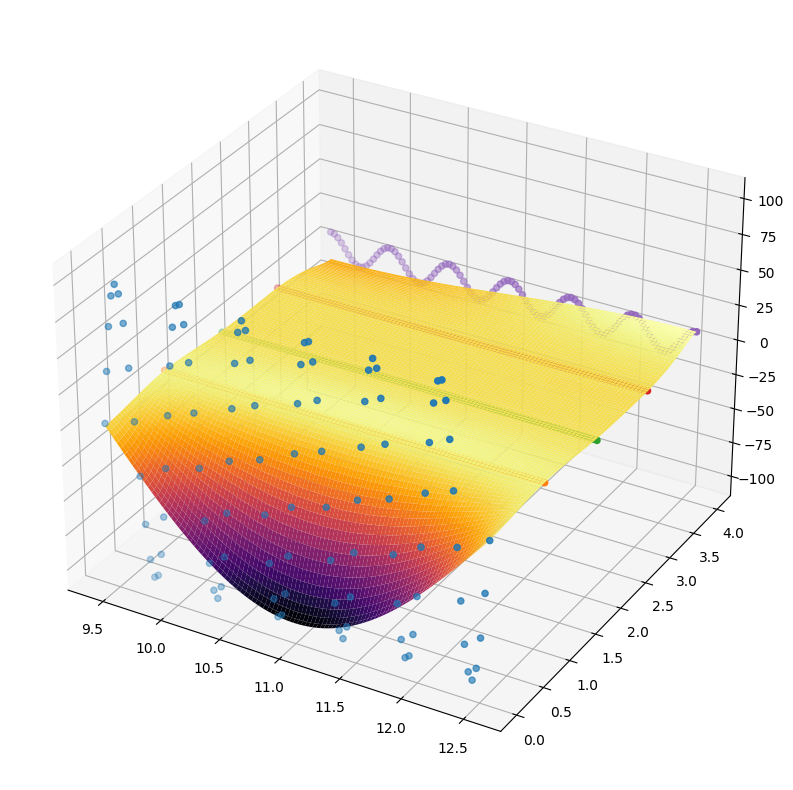

In [24]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')


ax.scatter(post_mean['x'][:,0], np.ones(100)*0,y_data[:,0])
ax.scatter(post_mean['x'][:,0], np.ones(100)*1,y_data[:,1])
ax.scatter(post_mean['x'][:,0], np.ones(100)*2,y_data[:,2])
ax.scatter(post_mean['x'][:,0], np.ones(100)*3,y_data[:,3])
ax.scatter(post_mean['x'][:,0], np.ones(100)*4,y_data[:,4])
ax.plot_surface(x_grid, y_grid, posterior_mean['f(x)'].reshape(100,100), rstride=1, cstride=1,cmap='inferno')

